Do `Kernel -> Restart & Run All` in top menu to run the notebook and enable the interactive widgets

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from numpy.fft import fft
from scipy.signal import square
from IPython.display import display

from ipywidgets import widgets

In [3]:
def square_wave(x, width, height, period):
    return height * (square(2*pi*(1/period)*(x+width/2),width/period)+1)/2

def sinc(x):
    return np.sinc(x / pi)

def spectrum_square_wave(k, width, height, period):
    omega = 2*pi / period
    return height * (width/period) * sinc(width/2 * k * omega)

In [4]:
def set_stem_plot(handle, x, y):
    ml, sl, _ = handle
    ml.set_data(x, y)
    for i_l, l in enumerate(sl):
        l.set_data(np.stack((x,x)).T[i_l], 
                   np.stack((np.zeros(x.shape), y)).T[i_l])

<IPython.core.display.Javascript object>


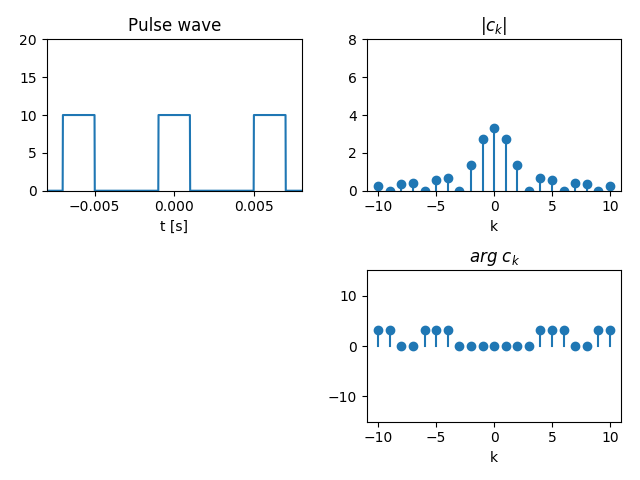

<function __main__.plot_square_wave>

In [5]:
x_axis = np.linspace(-0.008,0.008,1000)
k_lim = 10
k_axis = np.arange(-k_lim,k_lim+1)

w = 0.002  # width of a rectangle
h = 1 # height of rectangles
p = 0.006  # period
 
# setting up the plots
fig, ax = plt.subplots(2,2)
ax[0,0].set_xlim([-0.008,0.008])
ax[0,0].set_ylim([0,20])
ax[0,0].set_xlabel('t [s]')
ax[0,0].set_title('Pulse wave')
ax[0,1].set_xlim([-k_lim-1,k_lim+1])
ax[0,1].set_ylim([0,8])
ax[0,1].set_xlabel('k')
ax[0,1].set_title('$|c_k|$')
ax[1,1].set_xlim([-k_lim-1,k_lim+1])
ax[1,1].set_ylim([-15,15])
ax[1,1].set_xlabel('k')
ax[1,1].set_title('$arg\ c_k$')
ax[1,0].axis('off')
sig_plot, = ax[0,0].plot([],[])
spec_zeros = np.zeros(k_axis.shape)
magspec_plot = ax[0,1].stem(k_axis, spec_zeros, basefmt = ' ')
argspec_plot = ax[1,1].stem(k_axis, spec_zeros, basefmt = ' ')

plt.tight_layout()

# wrapper for interactive mode
def plot_square_wave(height=10, delay=0):
    delay = delay / 1000.0 # because we approximate the signal by 1000 points
    sq_wav = height * square_wave(x_axis-delay,w,h,p)
    spec_sq_wav = spectrum_square_wave(k_axis,w,height,p)
    mag_spec_sq_wav = np.abs(spec_sq_wav)
    ang_spec_sq_wav = np.angle(spec_sq_wav) - np.arange(-k_lim,k_lim+1)*delay*2*pi/p
    
    sig_plot.set_data(x_axis, sq_wav)
    set_stem_plot(magspec_plot, k_axis, mag_spec_sq_wav)
    set_stem_plot(argspec_plot, k_axis, ang_spec_sq_wav)
    plt.draw()
    
widgets.interact(plot_square_wave, 
                 height = (0.1,20.0,1), 
                 delay = (-5,5,0.1))
